In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Without PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
acc_without_pca = accuracy_score(y_test, y_pred)

In [12]:
# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
acc_with_pca = accuracy_score(y_test, y_pred_pca)

print("Explained Variance:", pca.explained_variance_ratio_)
print("Accuracy without PCA:", acc_without_pca)
print("Accuracy with PCA:", acc_with_pca)

Explained Variance: [0.7070102  0.24507687]
Accuracy without PCA: 1.0
Accuracy with PCA: 0.9111111111111111


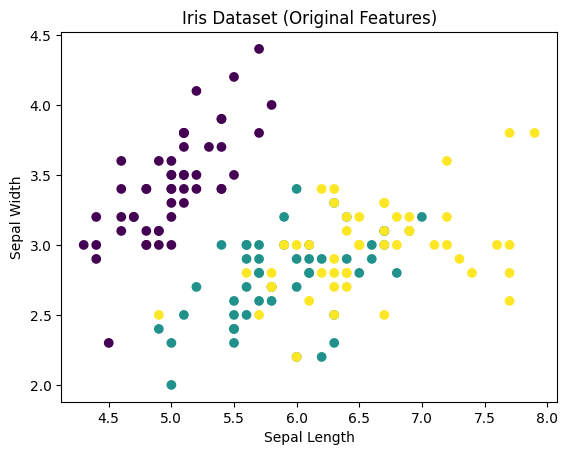

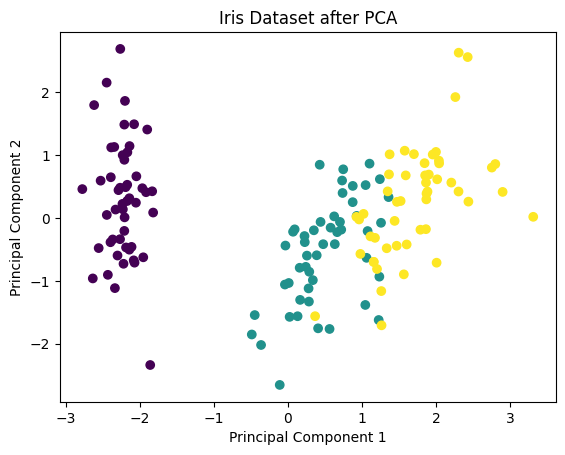

In [13]:
import matplotlib.pyplot as plt

# Scatter plot before PCA (using first two original features)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Original Features)")
plt.show()

# PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset after PCA")
plt.show()


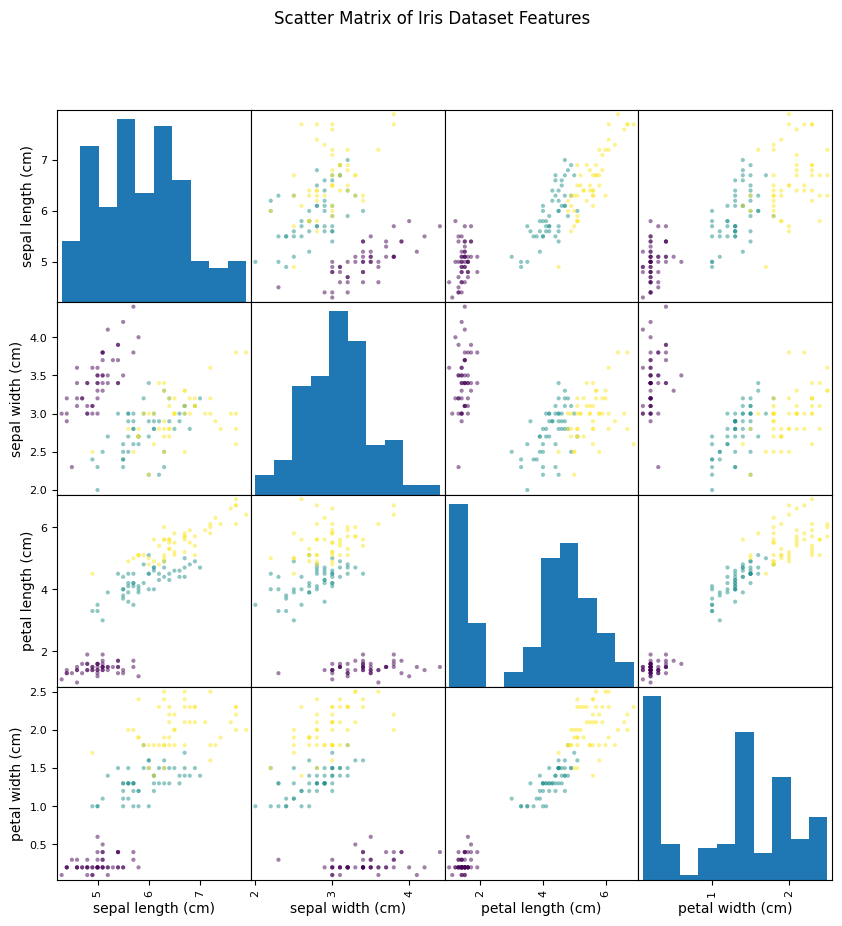

In [14]:
feature_names = data.feature_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Scatter matrix
pd.plotting.scatter_matrix(
    df[feature_names],
    figsize=(10, 10),
    c=y,
    diagonal='hist'
)

plt.suptitle("Scatter Matrix of Iris Dataset Features")
plt.show()